# Video Game Genre Prediction
- create a classification deep learning model to predict the genre of a video game based on its cover artwork
- convolutional neural network that ingests multiclass image data and predicts class properties


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.metrics import classification_report

import os, PIL
from glob import glob

import tensorflow as tf

print(tf.__version__)

2.7.0


In [2]:
""" Sequential Model Architecture """
Sequential = tf.keras.models.Sequential

""" Data Preprocessing Functions """
Resizing = tf.keras.layers.experimental.preprocessing.Resizing
Rescaling = tf.keras.layers.experimental.preprocessing.Rescaling

""" Data Augmentation Functions """
RandomFlip = tf.keras.layers.experimental.preprocessing.RandomFlip
RandomRotation = tf.keras.layers.experimental.preprocessing.RandomRotation
RandomZoom = tf.keras.layers.experimental.preprocessing.RandomZoom

""" Artificial Neural Network Layer Inventory """
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

""" Convolutional Neural Network Layer Inventory """
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPool2D
Flatten = tf.keras.layers.Flatten

""" Residual Network Layer Inventory """
ResNet50 = tf.keras.applications.resnet50.ResNet50

""" Function to Load Images from Target Folder """
image_dataset_from_directory = tf.keras.preprocessing.image_dataset_from_directory

Using an API he wrote code to gather images
- wrote a script to collect the images I wanted and save them for use in this project


In [3]:
DATA_DIRECTORY = "dataset/"
FIGHTING_GENRE_COVERS = f"{DATA_DIRECTORY}/fighting/*"
INDIE_GENRE_COVERS = f"{DATA_DIRECTORY}/indie/*"
PLATFORM_GENRE_COVERS = f"{DATA_DIRECTORY}/platform/*"
PUZZLE_GENRE_COVERS = f"{DATA_DIRECTORY}/puzzle/*"
SPORT_GENRE_COVERS = f"{DATA_DIRECTORY}/indie/*"

print(f"{len(glob(FIGHTING_GENRE_COVERS))} Fighting Game Covers")
print(f"{len(glob(INDIE_GENRE_COVERS))} Indie Game Covers")
print(f"{len(glob(PLATFORM_GENRE_COVERS))} Platform Game Covers")
print(f"{len(glob(PUZZLE_GENRE_COVERS))} Puzzle Game Covers")
print(f"{len(glob(SPORT_GENRE_COVERS))} Sport Game Covers")

1000 Fighting Game Covers
1000 Indie Game Covers
1000 Platform Game Covers
1000 Puzzle Game Covers
1000 Sport Game Covers


In [4]:
batch_size = 32
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

## Use an 80/20 split for the training and validation portions of our dataset:

In [5]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# making tf dataset objects
# using generators 
# the way this data is set up - we get small batches of it
train = image_dataset_from_directory(
    directory=DATA_DIRECTORY,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size
)

validation = image_dataset_from_directory(
    directory=DATA_DIRECTORY,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size
)

class_names = train.class_names
print(class_names)

Found 5000 files belonging to 5 classes.
Using 4000 files for training.
Found 5000 files belonging to 5 classes.
Using 1000 files for validation.
['fighting', 'indie', 'platform', 'puzzle', 'sport']


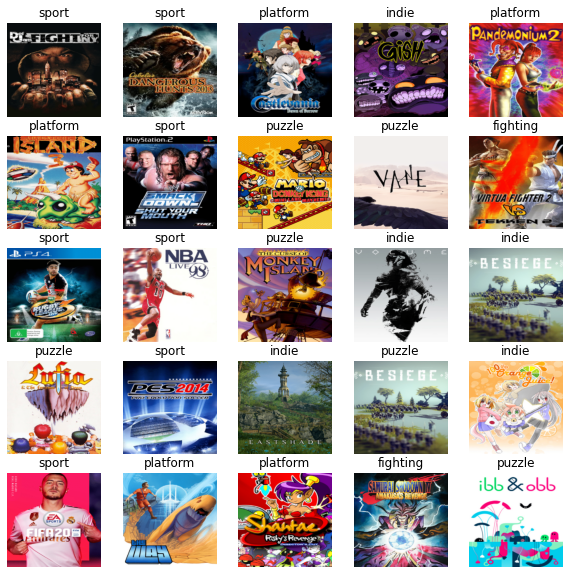

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
train = train.cache().shuffle(4000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [8]:
input_tensor = tf.keras.Input(shape=(224,224,3))
resnet_model = ResNet50(include_top=False, weights="imagenet", input_tensor=input_tensor)

ResNet50 - a pretrained CNN that has precalibrated weights from more than a million images in the imagenet database

In [9]:
for layer in resnet_model.layers[:143]:
    layer.trainable = False

for i, layer in enumerate(resnet_model.layers):
    print(i, layer.name, "Trainable: ", layer.trainable)

0 input_1 Trainable:  False
1 conv1_pad Trainable:  False
2 conv1_conv Trainable:  False
3 conv1_bn Trainable:  False
4 conv1_relu Trainable:  False
5 pool1_pad Trainable:  False
6 pool1_pool Trainable:  False
7 conv2_block1_1_conv Trainable:  False
8 conv2_block1_1_bn Trainable:  False
9 conv2_block1_1_relu Trainable:  False
10 conv2_block1_2_conv Trainable:  False
11 conv2_block1_2_bn Trainable:  False
12 conv2_block1_2_relu Trainable:  False
13 conv2_block1_0_conv Trainable:  False
14 conv2_block1_3_conv Trainable:  False
15 conv2_block1_0_bn Trainable:  False
16 conv2_block1_3_bn Trainable:  False
17 conv2_block1_add Trainable:  False
18 conv2_block1_out Trainable:  False
19 conv2_block2_1_conv Trainable:  False
20 conv2_block2_1_bn Trainable:  False
21 conv2_block2_1_relu Trainable:  False
22 conv2_block2_2_conv Trainable:  False
23 conv2_block2_2_bn Trainable:  False
24 conv2_block2_2_relu Trainable:  False
25 conv2_block2_3_conv Trainable:  False
26 conv2_block2_3_bn Trainable: 

In [10]:
resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = tf.keras.layers.BatchNormalization()

input_layer = tf.keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

flatten_layer = Flatten()

dropout_layer = Dropout(0.5)

dense_layer_1 = Dense(256, activation="relu")
dense_layer_2 = Dense(128, activation="relu")
dense_layer_3 = Dense(64, activation="relu")
output_layer = Dense(1, activation="sigmoid")

model = Sequential()

model.add(input_layer)
model.add(resizing_layer)
model.add(resnet_model)
model.add(flatten_layer)
model.add(normalization_layer)
model.add(dense_layer_1)
model.add(dropout_layer)
model.add(dense_layer_2)
model.add(dropout_layer)
model.add(dense_layer_3)
model.add(dropout_layer)
model.add(output_layer)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                        

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="model/genre_model.h5",
                                                monitor="val_accuracy",
                                                mode="max",
                                                save_best_only=True)

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
history = model.fit(train, validation_data=validation, callbacks=[checkpoint], epochs=5)

Epoch 1/5
125/125 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2050

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


125/125 [==============================] - 268s 2s/step - loss: 0.0000e+00 - accuracy: 0.2050 - val_loss: 0.0000e+00 - val_accuracy: 0.1910
Epoch 2/5
125/125 [==============================] - 244s 2s/step - loss: 0.0000e+00 - accuracy: 0.2023 - val_loss: 0.0000e+00 - val_accuracy: 0.1910
Epoch 3/5
125/125 [==============================] - 243s 2s/step - loss: 0.0000e+00 - accuracy: 0.2023 - val_loss: 0.0000e+00 - val_accuracy: 0.1910
Epoch 4/5
125/125 [==============================] - 243s 2s/step - loss: 0.0000e+00 - accuracy: 0.2023 - val_loss: 0.0000e+00 - val_accuracy: 0.1910
Epoch 5/5
125/125 [==============================] - 242s 2s/step - loss: 0.0000e+00 - accuracy: 0.2023 - val_loss: 0.0000e+00 - val_accuracy: 0.1910


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                        

In [17]:
model.evaluate(validation)

32/32 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 0.1910


[0.0, 0.19099999964237213]

He said the game's multi-labeling stopped and hindered his results
- Games are complex works of art, and more often than not, they tend to involve varying types of gameplay experiences. Relatively few games have only one genre


In [15]:
model.save("model/genre_model.h5")

/Users/kou/dev/courses/acs3520/Fire-Detection-API-Project/env/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Tuning and Making Improvements - Veer

In [18]:
resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = tf.keras.layers.BatchNormalization()

input_layer = tf.keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

flatten_layer = Flatten()

dropout_layer = Dropout(0.5)

dense_layer_1 = Dense(256, activation="relu")
dense_layer_2 = Dense(128, activation="relu")
dense_layer_3 = Dense(64, activation="relu")
output_layer = Dense(5, activation="softmax")

model = Sequential()

model.add(input_layer)
model.add(resizing_layer)
model.add(resnet_model)
model.add(flatten_layer)
model.add(normalization_layer)
model.add(dense_layer_1)
model.add(dropout_layer)
model.add(dense_layer_2)
model.add(dropout_layer)
model.add(dense_layer_3)
model.add(dropout_layer)
model.add(output_layer)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                      

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="model/genre_model.h5",
                                                monitor="val_accuracy",
                                                mode="max",
                                                save_best_only=True)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
history = model.fit(train, validation_data=validation, callbacks=[checkpoint], epochs=5)

Epoch 1/5
125/125 [==============================] - 256s 2s/step - loss: 41.9864 - accuracy: 0.2310 - val_loss: 2.3868 - val_accuracy: 0.3000
Epoch 2/5
125/125 [==============================] - 245s 2s/step - loss: 4.4941 - accuracy: 0.2620 - val_loss: 1.7054 - val_accuracy: 0.2530
Epoch 3/5
125/125 [==============================] - 242s 2s/step - loss: 3.0283 - accuracy: 0.2432 - val_loss: 1.6004 - val_accuracy: 0.2510
Epoch 4/5
125/125 [==============================] - 251s 2s/step - loss: 2.3559 - accuracy: 0.2587 - val_loss: 1.5947 - val_accuracy: 0.2500
Epoch 5/5
125/125 [==============================] - 252s 2s/step - loss: 2.0427 - accuracy: 0.2520 - val_loss: 1.6012 - val_accuracy: 0.2330


In [22]:
model.evaluate(validation)

32/32 [==============================] - 33s 1s/step - loss: 1.6012 - accuracy: 0.2330


[1.601237416267395, 0.2329999953508377]

In [155]:
model.save("model/genre_model.h5")

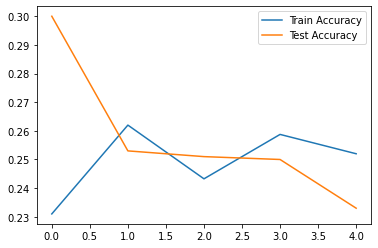

In [23]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.legend()
plt.show()

## This is the code from his kaggle which he said had the highest results for his model

In [13]:
resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = tf.keras.layers.BatchNormalization()

input_layer = tf.keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
flip_layer = RandomFlip(mode="horizontal_and_vertical")
rotation_layer = RandomRotation(factor=0.2, fill_mode="nearest")
zoom_layer = RandomZoom(height_factor=0.2, width_factor=0.3, fill_mode="nearest")

augmentation_layer = Sequential([flip_layer, rotation_layer, zoom_layer])

flatten_layer = Flatten()

dropout_layer = Dropout(0.3)

dense_layer_1 = Dense(256, activation="relu")
dense_layer_2 = Dense(128, activation="relu")
dense_layer_3 = Dense(64, activation="relu")
output_layer = Dense(5, activation="softmax")

In [14]:
model = Sequential()

model.add(input_layer)
model.add(augmentation_layer)
model.add(resizing_layer)
model.add(resnet_model)
model.add(flatten_layer)
model.add(normalization_layer)
model.add(dense_layer_1)
model.add(dropout_layer)
model.add(dense_layer_2)
model.add(dropout_layer)
model.add(dense_layer_3)
model.add(dropout_layer)
model.add(output_layer)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                      

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(train, validation_data=validation, epochs=5)

In [28]:
model.evaluate(validation)

32/32 [==============================] - 34s 1s/step - loss: 1.4545 - accuracy: 0.4010


[1.4545314311981201, 0.4009999930858612]

# Here is where my edits come into action
After downloading the repo Ive been working on improving accuracy for Veer’s project.

The first change I made was to switch to ResNet50's imagenet insteaed of his pre trained weights. 
Since this data is all new I wanted to make sure there was no overfitting from his pre trained data in order to see if there was any imporvement on accurcy.


In [17]:
# going to try and run this model with VGG19 instead of ResNet50
# Making sure I have the right imports
from tensorflow.keras.applications.vgg19 import VGG19

vgg19_model = VGG19(include_top=False ,weights='imagenet',input_tensor=None)

In [18]:
# gonna to make this around 80 untrainable like he did with his resnet layers
for layer in vgg19_model.layers[:15]:
    layer.trainable = False

for i, layer in enumerate(vgg19_model.layers):
    print(i, layer.name, "Trainable: ", layer.trainable)

0 input_4 Trainable:  False
1 block1_conv1 Trainable:  False
2 block1_conv2 Trainable:  False
3 block1_pool Trainable:  False
4 block2_conv1 Trainable:  False
5 block2_conv2 Trainable:  False
6 block2_pool Trainable:  False
7 block3_conv1 Trainable:  False
8 block3_conv2 Trainable:  False
9 block3_conv3 Trainable:  False
10 block3_conv4 Trainable:  False
11 block3_pool Trainable:  False
12 block4_conv1 Trainable:  False
13 block4_conv2 Trainable:  False
14 block4_conv3 Trainable:  False
15 block4_conv4 Trainable:  True
16 block4_pool Trainable:  True
17 block5_conv1 Trainable:  True
18 block5_conv2 Trainable:  True
19 block5_conv3 Trainable:  True
20 block5_conv4 Trainable:  True
21 block5_pool Trainable:  True


In [21]:
resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = tf.keras.layers.BatchNormalization()

input_layer = tf.keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
flip_layer = RandomFlip(mode="horizontal_and_vertical")
rotation_layer = RandomRotation(factor=0.2, fill_mode="nearest")
zoom_layer = RandomZoom(height_factor=0.2, width_factor=0.3, fill_mode="nearest")

augmentation_layer = Sequential([flip_layer, rotation_layer, zoom_layer])

flatten_layer = Flatten()

dropout_layer = Dropout(0.3)

dense_layer_1 = Dense(256, activation="relu")
dense_layer_2 = Dense(128, activation="relu")
dense_layer_3 = Dense(64, activation="relu")
output_layer = Dense(5, activation="softmax")

In [22]:
# now im going to try and use the same model format and see what data we get 
model = Sequential()

model.add(input_layer)
model.add(augmentation_layer)
model.add(resizing_layer)
model.add(vgg19_model)
model.add(flatten_layer)
model.add(normalization_layer)
model.add(dense_layer_1)
model.add(dropout_layer)
model.add(dense_layer_2)
model.add(dropout_layer)
model.add(dense_layer_3)
model.add(dropout_layer)
model.add(output_layer)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 256)               6422784   
                                                      

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [24]:
history = model.fit(train, validation_data=validation, epochs=5)

Epoch 1/5
125/125 [==============================] - 658s 5s/step - loss: 1.7937 - accuracy: 0.2355 - val_loss: 1.8054 - val_accuracy: 0.2220
Epoch 2/5
125/125 [==============================] - 644s 5s/step - loss: 1.6458 - accuracy: 0.2460 - val_loss: 1.5835 - val_accuracy: 0.2390
Epoch 3/5
125/125 [==============================] - 645s 5s/step - loss: 1.6001 - accuracy: 0.2565 - val_loss: 1.6931 - val_accuracy: 0.1870
Epoch 4/5
125/125 [==============================] - 644s 5s/step - loss: 1.5855 - accuracy: 0.2755 - val_loss: 1.5756 - val_accuracy: 0.2810
Epoch 5/5
125/125 [==============================] - 644s 5s/step - loss: 1.5810 - accuracy: 0.2688 - val_loss: 11.4911 - val_accuracy: 0.2740


In [25]:
model.evaluate(validation)

32/32 [==============================] - 89s 3s/step - loss: 11.4911 - accuracy: 0.2740


[11.491118431091309, 0.27399998903274536]

Doing this has lead to worse off accuracy than what he had gathered before

## Adding in a new model format for Multilabel Classficiatoin

In [27]:
from tensorflow.keras.losses import BinaryCrossentropy
# making my own Binary Crossentropy since running it before led to some errors with the size of the model
class MyBinaryCrossentropy(BinaryCrossentropy):
  def __call__(self, y_true, y_pred, sample_weight=None):
    # TODO check data types
    # one-hot encode
    y_true = tf.one_hot(y_true, depth=5)  # no. of classes?
    # reshaping it to be one array 
    y_true = tf.reshape(y_true, [-1,5])
    return super().__call__(y_true, y_pred, sample_weight)


## Building this new model

In [28]:
# attepmting to impliment the Mulresizing_layerClassficiatoin
# Changing some of the dense layer functins before adding in the multilabel

resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = tf.keras.layers.BatchNormalization()

input_layer = tf.keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
flip_layer = RandomFlip(mode="horizontal_and_vertical")
rotation_layer = RandomRotation(factor=0.2, fill_mode="nearest")
zoom_layer = RandomZoom(height_factor=0.2, width_factor=0.3, fill_mode="nearest")

augmentation_layer = Sequential([flip_layer, rotation_layer, zoom_layer])

flatten_layer = Flatten()

dropout_layer = Dropout(0.3)

dense_layer_1 = Dense(256, kernel_initializer='he_uniform', activation='relu')
dense_layer_2 = Dense(128, activation="relu")
dense_layer_3 = Dense(64, activation="relu")
output_layer = Dense(5, activation='sigmoid')

In [29]:
model = Sequential()

model.add(input_layer)
model.add(augmentation_layer)
model.add(resizing_layer)
model.add(resnet_model)
model.add(flatten_layer)

model.add(normalization_layer)

model.add(dense_layer_1)
model.add(dropout_layer)
model.add(dense_layer_2)
model.add(dropout_layer)
model.add(dense_layer_3)
model.add(dropout_layer)

model.add(output_layer)

In [30]:
model.compile(loss=MyBinaryCrossentropy(), 
              optimizer='adam',
             metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resizing_4 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 256)               25690368  
                                                      

In [32]:
history = model.fit(train, validation_data=validation, epochs=5)

Epoch 1/5
125/125 [==============================] - 762s 6s/step - loss: 0.6102 - accuracy: 0.2002 - val_loss: 0.5715 - val_accuracy: 0.2010
Epoch 2/5
125/125 [==============================] - 767s 6s/step - loss: 0.5290 - accuracy: 0.2040 - val_loss: 0.5380 - val_accuracy: 0.2140
Epoch 3/5
125/125 [==============================] - 814s 7s/step - loss: 0.5208 - accuracy: 0.2113 - val_loss: 0.5433 - val_accuracy: 0.2580
Epoch 4/5
125/125 [==============================] - 799s 6s/step - loss: 0.5169 - accuracy: 0.2083 - val_loss: 0.5043 - val_accuracy: 0.2340
Epoch 5/5
125/125 [==============================] - 760s 6s/step - loss: 0.5176 - accuracy: 0.2048 - val_loss: 0.5091 - val_accuracy: 0.1770


In [63]:
model.evaluate(validation)

32/32 [==============================] - 34s 1s/step - loss: 0.4682 - accuracy: 0.4140


[0.4681517481803894, 0.414000004529953]

Thoughts:
its working better but still to low, needs the multi-label

## Trying the model again but with sigmoid as all of the activators

In [75]:
resizing_layer = Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
normalization_layer = tf.keras.layers.BatchNormalization()

input_layer = tf.keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
flip_layer = RandomFlip(mode="horizontal_and_vertical")
rotation_layer = RandomRotation(factor=0.2, fill_mode="nearest")
zoom_layer = RandomZoom(height_factor=0.2, width_factor=0.3, fill_mode="nearest")

augmentation_layer = Sequential([flip_layer, rotation_layer, zoom_layer])

flatten_layer = Flatten()

dropout_layer = Dropout(0.3)
# adding that sigmoid in
dense_layer_1 = Dense(256, kernel_initializer='he_uniform', activation='sigmoid')
dense_layer_2 = Dense(128, activation="sigmoid")
dense_layer_3 = Dense(64, activation="sigmoid")
output_layer = Dense(5, activation='sigmoid')

In [76]:
model = Sequential()

model.add(input_layer)
model.add(augmentation_layer)
model.add(resizing_layer)
model.add(resnet_model)
model.add(flatten_layer)

model.add(normalization_layer)

model.add(dense_layer_1)
model.add(dropout_layer)
model.add(dense_layer_2)
model.add(dropout_layer)
model.add(dense_layer_3)
model.add(dropout_layer)

model.add(output_layer)

In [77]:
model.compile(loss=MyBinaryCrossentropy(), 
              optimizer='adam',
             metrics=["accuracy"])

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_2 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 256)               25690368  
                                                      

In [79]:
history = model.fit(train, validation_data=validation, epochs=5)

Epoch 1/5
125/125 [==============================] - 260s 2s/step - loss: 0.5000 - accuracy: 0.2960 - val_loss: 0.4706 - val_accuracy: 0.3430
Epoch 2/5
125/125 [==============================] - 255s 2s/step - loss: 0.4633 - accuracy: 0.3783 - val_loss: 0.4515 - val_accuracy: 0.3980
Epoch 3/5
125/125 [==============================] - 254s 2s/step - loss: 0.4483 - accuracy: 0.4085 - val_loss: 0.4580 - val_accuracy: 0.3860
Epoch 4/5
125/125 [==============================] - 254s 2s/step - loss: 0.4389 - accuracy: 0.4200 - val_loss: 0.4408 - val_accuracy: 0.4300
Epoch 5/5
125/125 [==============================] - 254s 2s/step - loss: 0.4335 - accuracy: 0.4340 - val_loss: 0.4390 - val_accuracy: 0.4020


In [81]:
model.evaluate(validation)

32/32 [==============================] - 33s 1s/step - loss: 0.4390 - accuracy: 0.4020


[0.43903982639312744, 0.4020000100135803]

## Going to start working on getting our data as X and Y

In [65]:
import os

for path in os.walk(DATA_DIRECTORY):
  print(path[0])

dataset/
dataset/fighting
dataset/indie
dataset/platform
dataset/puzzle
dataset/sport


# Whats next?
The next steps in my eyes are finding out how to get the data into x and y so we can use K-folds or cross entropy. I was using os.walk to find the data in another view so then i could try to gather the images together and access the data thatway. I also think adding some callback functions would be amazing for a dataset like this since it takes so long to run through each session. This would freetime to further work on tuing the model. The last thing I would like to understand his API more so I could get more imgaes and maybe us that to help imporve the model.